<a href="https://colab.research.google.com/github/J0SAL/Learning-DL/blob/main/KrishNaik/1.%20ANN%20customer%20churn%20with%20early%20stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install tensorflow-gpu


In [40]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [41]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


**one hot encoding**

In [43]:
# creating dummy variables & removing the last column
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [44]:
## Concatenate the Data Frames
X = pd.concat([X, geography, gender], axis = 'columns') # - columns <-> 1, row <-> 0
X = X.drop(['Geography', 'Gender'], axis=1);
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train) #prepare formula and apply transform
X_test = sc.transform(X_test) #only transform

In [52]:
X.columns.size

11

**model creation**

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [79]:
# Initialising the ANN
classifier = Sequential() #so backward and forward propogation is possible 

In [80]:
# Adding the input layer 
classifier.add(Dense(units=11,activation='relu')) #dataset has 11 features & Dense created the neurons

In [81]:
# Adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [82]:
# Adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [83]:
# Adding output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [84]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [85]:
# Early stopping condition
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [86]:
# train the model
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4971 - accuracy: 0.7962 - val_loss: 0.4666 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4431 - accuracy: 0.7990 - val_loss: 0.4383 - val_accuracy: 0.7989
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4204 - accuracy: 0.8078 - val_loss: 0.4251 - val_accuracy: 0.8088
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4034 - accuracy: 0.8225 - val_loss: 0.4106 - val_accuracy: 0.8141
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3859 - accuracy: 0.8386 - val_loss: 0.3924 - val_accuracy: 0.8285
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3680 - accuracy: 0.8438 - val_loss: 0.3922 - val_accuracy: 0.8262
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3581 - accuracy: 0.8520 - val_loss: 0.3702 - val_accuracy:

In [89]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


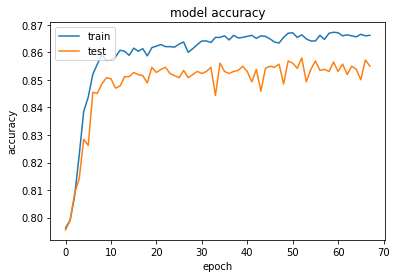

In [87]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

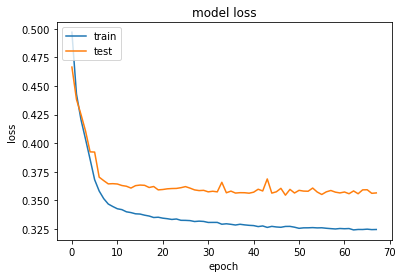

In [88]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

I am taking an example here, suppose you were given a set of images/pictures of Dogs and Cats and asked to make a model and classify the images into **dogs and cats**. Then the above terms would mean.

- **Human Accuracy:** 
  - How accurately a human like you and I are able to classify the set of pictures into Dogs and Cats.
- **Training Accuracy:**
  - How the model is able to classify the two images during training on the training dataset.
- **Valid Accuracy:**
  - How the model is able to classify the images with the validation dataset. ( A validation dataset is a sample of data held back from training your model that is used to give an estimate of model skill while training the model)
- **Test Accuracy:** 
  - How the model is able to classify between the cats and dogs when real-world data or test data used.
  Hope this helps! Thank You.

In [90]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [91]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1518,   77],
       [ 198,  207]])

In [92]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8625